In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df['deck'].isna().sum()/891

0.7721661054994389

we can drop (deck) column because it have 77% nan values

In [5]:
df.drop('deck', axis=1, inplace= True)

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


(pclass) and (class) is duplicate --
(survived) and (alive) is duplicate --
(embarked) and (embark_town) is duplicate


In [7]:
df.drop(['class', 'embark_town', 'alive'], axis=1, inplace= True)


In [8]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,True


work with nan

In [9]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace= True)
df['age'].fillna(df['age'].median(), inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    object 
 8   who         891 non-null    object 
 9   adult_male  891 non-null    bool   
 10  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 64.5+ KB


In [10]:
df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [11]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,True


work with categorical data

In [12]:
df = pd.get_dummies(data=df, columns=['sex', 'embarked', 'who'], drop_first=True)

In [13]:
df.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,who_man,who_woman
0,0,3,22.0,1,0,7.2500,True,False,1,0,1,1,0
1,1,1,38.0,1,0,71.2833,False,False,0,0,0,0,1
2,1,3,26.0,0,0,7.9250,False,True,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,False,False,0,0,1,0,1
4,0,3,35.0,0,0,8.0500,True,True,1,0,1,1,0


In [14]:
encode = {True:1,False:0}
df['adult_male'] = df['adult_male'].map(encode)
df['alone'] = df['alone'].map(encode)
df.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,who_man,who_woman
0,0,3,22.0,1,0,7.2500,1,0,1,0,1,1,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,1
2,1,3,26.0,0,0,7.9250,0,1,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,0,1,0,1
4,0,3,35.0,0,0,8.0500,1,1,1,0,1,1,0


c:\Users\Yousef\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Yousef\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

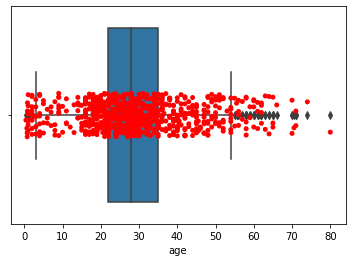

In [15]:
sns.boxplot(df['age'])
sns.stripplot(df['age'], color='red')

(age), (fare) have outliers

In [16]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,who_man,who_woman
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.602694,0.602694,0.647587,0.086420,0.725028,0.602694,0.304153
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.489615,0.489615,0.477990,0.281141,0.446751,0.489615,0.460306
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
! pip install datasist


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from datasist.structdata import detect_outliers

index = detect_outliers(df, 0, ['age', 'fare'])
index

[7,
 11,
 15,
 16,
 33,
 54,
 78,
 94,
 96,
 116,
 119,
 152,
 164,
 170,
 172,
 174,
 183,
 195,
 205,
 232,
 252,
 268,
 275,
 280,
 297,
 305,
 326,
 340,
 366,
 381,
 386,
 438,
 456,
 467,
 469,
 479,
 483,
 487,
 492,
 493,
 530,
 545,
 555,
 570,
 587,
 625,
 626,
 630,
 642,
 644,
 647,
 659,
 672,
 684,
 694,
 745,
 755,
 772,
 788,
 803,
 824,
 827,
 829,
 831,
 851,
 879,
 1,
 27,
 31,
 34,
 52,
 61,
 62,
 72,
 88,
 102,
 118,
 120,
 124,
 139,
 151,
 159,
 180,
 201,
 215,
 218,
 224,
 230,
 245,
 256,
 257,
 258,
 262,
 269,
 290,
 291,
 299,
 306,
 307,
 310,
 311,
 318,
 319,
 324,
 325,
 332,
 334,
 336,
 337,
 341,
 369,
 373,
 375,
 377,
 380,
 385,
 390,
 393,
 412,
 435,
 445,
 453,
 484,
 486,
 496,
 498,
 504,
 505,
 520,
 527,
 537,
 540,
 544,
 550,
 557,
 558,
 581,
 585,
 591,
 609,
 627,
 641,
 645,
 655,
 660,
 665,
 679,
 681,
 689,
 698,
 700,
 708,
 716,
 730,
 737,
 741,
 742,
 759,
 763,
 765,
 779,
 789,
 792,
 802,
 820,
 835,
 846,
 849,
 856,
 863]

In [19]:
len(index)

170

In [81]:
df['age'].describe()

count    891.000000
mean      28.529742
std        9.847886
min        3.000000
25%       23.000000
50%       28.000000
75%       33.000000
max       54.000000
Name: age, dtype: float64

In [75]:
w = np.random.randint(22,36)
w

24

In [76]:

index = detect_outliers(df, 0, ['fare'])
val = df['fare'].mean()
df['fare'].iloc[index] = val

index = detect_outliers(df, 0, ['age'])
for i in index:
    df['age'].iloc[i] = np.random.randint(22,36)

C:\Users\Yousef\AppData\Local\Temp\ipykernel_960\888244850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fare'].iloc[index] = val
C:\Users\Yousef\AppData\Local\Temp\ipykernel_960\888244850.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'].iloc[i] = np.random.randint(22,36)


In [77]:
df.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,who_man,who_woman
0,0,3,22.0,1,0,7.250000,1,0,1,0,1,1,0
1,1,1,38.0,1,0,32.204208,0,0,0,0,0,0,1
2,1,3,26.0,0,0,7.925000,0,1,0,0,1,0,1
3,1,1,35.0,1,0,53.100000,0,0,0,0,1,0,1
4,0,3,35.0,0,0,8.050000,1,1,1,0,1,1,0


c:\Users\Yousef\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Yousef\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

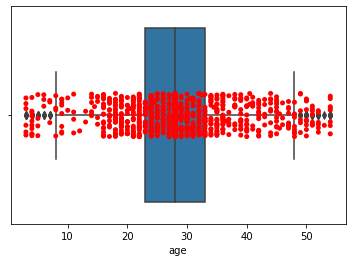

In [79]:
sns.boxplot(df['age'])
sns.stripplot(df['age'], color='red')

In [80]:
index = detect_outliers(df, 0, ['age', 'fare'])
len(index)

64

In [85]:
X = df.drop('survived', axis=1)
y = df['survived']


In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [88]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0).fit(x_train, y_train)

c:\Users\Yousef\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
prid = model.predict(x_test)

In [117]:
v = np.array([[1,35.0,1,0	,53.100000,	0,	0,	0,	0,	1,	0,	1]])
v

array([[ 1. , 35. ,  1. ,  0. , 53.1,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,
         1. ]])

In [118]:
print(model.predict(v))

[1]


c:\Users\Yousef\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [90]:
prid

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
acc = print(f'acc = {accuracy_score(y_test, prid)}')

acc = 0.8156424581005587
